# Простая линейная регрессия (Simple Regression)

---

**Простой называют линейную регрессию, в модели которой число независимых переменных равно 1.**

---

$y=b_{0} + b_{1}x$

$y$ - зависимая переменная, что мы измеряем в эксперименте (dependent variable)

$x$ - независимая переменная (independent variable)

$b_{0}$ - показывает, чему равна зависимая переменная, если предиктор равен нулю (intercept)

$b_{1}$ - показывает, насколько изменяется зависимая переменная при изменении независимой переменной (coef | slope)

---

Параметр модели $b_{1}$ вычисляется при помощи метода наименьших квадратов (Ordinary Least Squares).

---

<center><img src="images/linear_regression_marks.png" alt="linear_regression_marks" width=500 height=500"/></center>

<center><img src="images/linear_regression.gif" alt="linear_regression" width=1500 height=1500"/></center>

## Импорт пакетов
- `matplotlib.pyplot`, `pylab`, `seaborn` - рисование графиков
- `pandas` - работа с таблицами
- `numpy` - работа с матрицами

In [1]:
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns

import pandas as pd

import numpy as np

%matplotlib inline

## Анализ данных

`FuelConsumption.csv` (Рейтинги расхода топлива):

[Dataset source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


### Загрузка данных

In [2]:
import os
notebook_path = os.path.abspath("Notebook.ipynb")    # получить "точку отсчета" для поиска файла
data_csv = os.path.join(os.path.dirname(notebook_path), "data/FuelConsumptionCo2.csv")
df = pd.read_csv(data_csv)

# вывести первые 5 строк из таблицы
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# вывести последние 5 строк таблицы
df.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


### Исследование данных (Data Exploration)

**По умолчанию будет выдана информация только для количественных признаков.**
- `count` - количество элементов
- `mean` - среднее значение
- `std` - стандартное отклонение
- `min` - минимальное значение
- `25%` - нижний квартиль
- `50%` - медиана
- `75%` - верхний квартиль
- `max` - максимальное значение

In [5]:
# обзор Dataframe из файла FuelConsumptionCo2.csv
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
# вывести первые 9 строк
df.head(9)    

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267


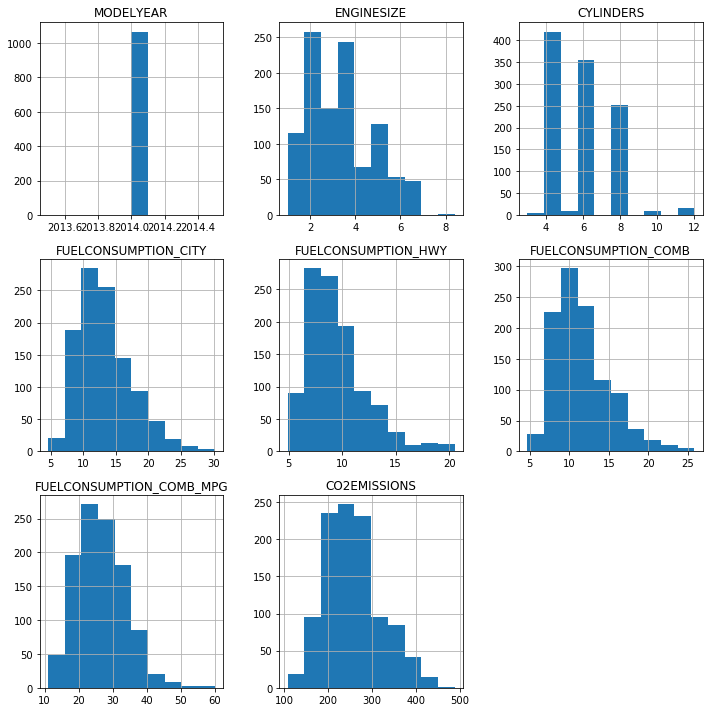

In [7]:
# гистограмма
df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

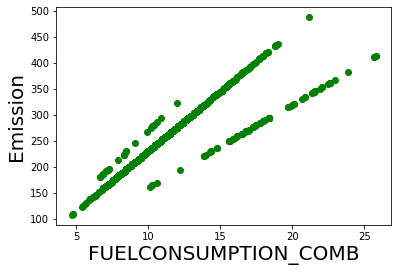

In [8]:
plt.scatter(df.FUELCONSUMPTION_COMB, 
            df.CO2EMISSIONS,  
            color='green')
plt.xlabel("FUELCONSUMPTION_COMB", fontsize=20)
plt.ylabel("Emission", fontsize=20)
plt.show()

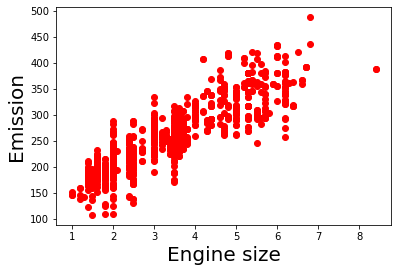

In [9]:
plt.scatter(df.ENGINESIZE, 
            df.CO2EMISSIONS,  
            color='red')
plt.xlabel("Engine size", fontsize=20)
plt.ylabel("Emission", fontsize=20)
plt.show()

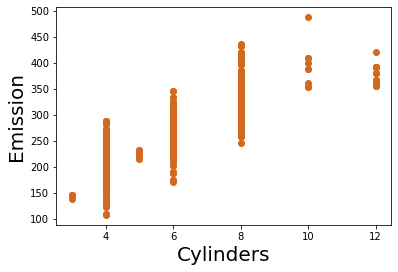

In [10]:
plt.scatter(df.CYLINDERS, 
            df.CO2EMISSIONS,  
            color='chocolate')
plt.xlabel("Cylinders", fontsize=20)
plt.ylabel("Emission", fontsize=20)
plt.show()

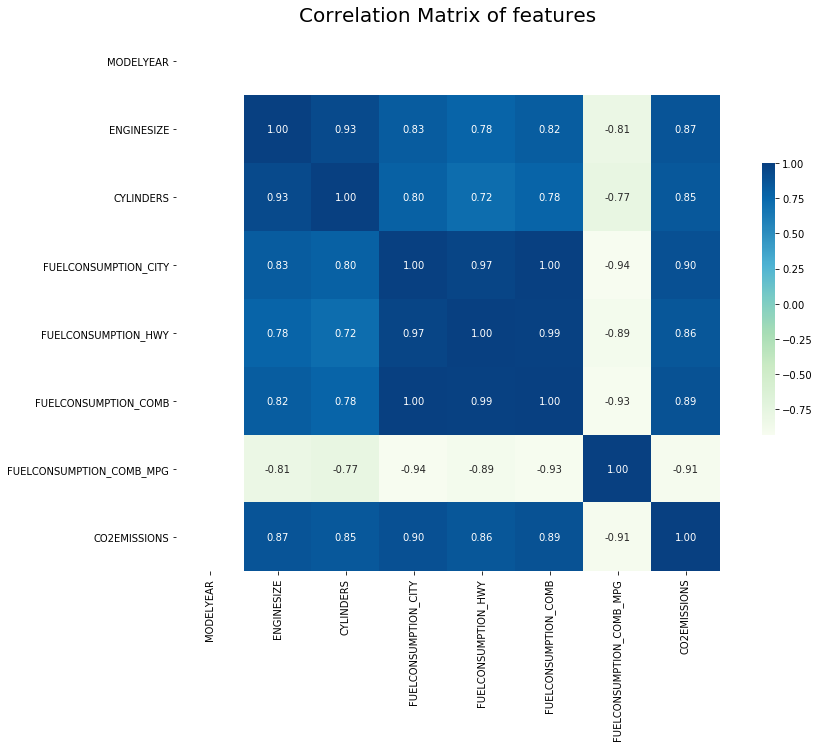

In [11]:
correlation_matrix = df.corr()

plt.figure(figsize=(15, 10))

ax = sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='GnBu',
    cbar_kws={"shrink": .5},
    robust=True
)

plt.title('Correlation Matrix of features', fontsize=20)
plt.show()

## Обучение модели (Train)

In [12]:
# разделить независимую и зависимую переменные / train и test

from sklearn.model_selection import train_test_split

Y = df['CO2EMISSIONS'].copy()
X = df[['ENGINESIZE']].copy()
#X = df.drop(['CO2EMISSIONS', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [13]:
# импортировать из пакета с моделями модель линейной регрессии
from sklearn import linear_model

# создать объект линейной регрессии
simple_regr = linear_model.LinearRegression()

# обучить модель
simple_regr.fit(X_train, y_train)

# вывести результаты обучения
print('Coefficients: ', simple_regr.coef_)
print('Intercept: ',simple_regr.intercept_)

Coefficients:  [39.16827831]
Intercept:  126.0036091541026


## Визуализация результата обучения модели

Text(0, 0.5, 'Emission')

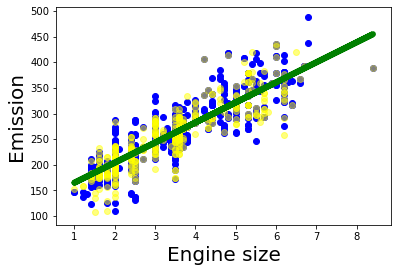

In [19]:
plt.scatter(X_train, y_train,  color='blue')
plt.scatter(X_test, y_test,  color='yellow', alpha=0.5)
plt.plot(X_train, 
        simple_regr.coef_[0]*X_train + simple_regr.intercept_, 
        '-g', 
        linewidth=6)
plt.xlabel("Engine size", fontsize=20)
plt.ylabel("Emission", fontsize=20)

## Оценка качества модели (Evaluation)

In [15]:
# использовать обученную модель для предсказания на test выборке
y_predicted = simple_regr.predict(X_test)

# вывести результаты предсказания
print(f'Variance score: {simple_regr.score(X_test, y_test)}')    # Coefficient of determination R^2 of the prediction
print(f"Residual sum of squares: {np.mean((y_predicted - y_test) ** 2)}")    # MSE

Variance score: 0.7648412489948487
Residual sum of squares: 957.6303149019186


In [16]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predicted)    # эквивалентно simple_regr.score(X_test, y_test)

0.7648412489948487

In [17]:
from sklearn.metrics import mean_squared_error

# MSE
mean_squared_error(y_test, y_predicted, squared=True)   # эквивалентно np.mean((y_predicted - y_test) ** 2)

957.6303149019186